In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [4]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [5]:
def bias(y, z):
    return (y - z)

In [6]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    trees = []
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=5)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

### Для построения графиков объявляем массивы и дополняем функцию для записи в них данных:

In [7]:
tr_gr = []
dp_gr = []
er_gr_tst = []
er_gr_tr = []

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    
    tr_gr.append(n_trees)
    dp_gr.append(max_depth)
    er_gr_tst.append(mean_squared_error(y_test, test_prediction))
    er_gr_tr.append(mean_squared_error(y_train, train_prediction))
    
    print(f'Ошибка {n_trees} деревьев глубиной {max_depth} с шагом {eta} на train: {mean_squared_error(y_train, train_prediction)}')
    print(f'Ошибка {n_trees} деревьев глубиной {max_depth} с шагом {eta} на test выборке: {mean_squared_error(y_test, test_prediction)}')

### Строим модели с изменяющимся количеством деревьев:

In [9]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 2 с шагом 0.1 на train: 6048.110584653372
Ошибка 10 деревьев глубиной 2 с шагом 0.1 на test выборке: 6833.119187001435
CPU times: total: 2.08 s
Wall time: 2.08 s


In [10]:
%%time
n_trees = 15
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 15 деревьев глубиной 2 с шагом 0.1 на train: 3843.5756264725796
Ошибка 15 деревьев глубиной 2 с шагом 0.1 на test выборке: 4510.181796113489
CPU times: total: 4.55 s
Wall time: 4.54 s


In [11]:
%%time
n_trees = 20
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 20 деревьев глубиной 2 с шагом 0.1 на train: 2981.173924276966
Ошибка 20 деревьев глубиной 2 с шагом 0.1 на test выборке: 3623.7397086543265
CPU times: total: 8.14 s
Wall time: 8.14 s


In [12]:
%%time
n_trees = 25
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 25 деревьев глубиной 2 с шагом 0.1 на train: 2602.7688682293283
Ошибка 25 деревьев глубиной 2 с шагом 0.1 на test выборке: 3315.3957611179203
CPU times: total: 13.6 s
Wall time: 13.6 s


In [13]:
%%time
n_trees = 30
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 30 деревьев глубиной 2 с шагом 0.1 на train: 2400.986187796745
Ошибка 30 деревьев глубиной 2 с шагом 0.1 на test выборке: 3170.8009825404556
CPU times: total: 18.7 s
Wall time: 18.7 s


### Записываем данные для первого графика

In [14]:
x1 = tr_gr
y1 = er_gr_tst
y11 = er_gr_tr

### Обнуляем массивы и строим модели с изменяющейся глубиной:

In [15]:
tr_gr = []
dp_gr = []
er_gr_tst = []
er_gr_tr = []

In [16]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 1
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 1 с шагом 0.1 на train: 6605.129456034838
Ошибка 10 деревьев глубиной 1 с шагом 0.1 на test выборке: 7618.317928393838
CPU times: total: 2.05 s
Wall time: 2.02 s


In [17]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 2 с шагом 0.1 на train: 6048.110584653372
Ошибка 10 деревьев глубиной 2 с шагом 0.1 на test выборке: 6833.119187001435
CPU times: total: 2.09 s
Wall time: 2.08 s


In [18]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 3 с шагом 0.1 на train: 5665.989285985342
Ошибка 10 деревьев глубиной 3 с шагом 0.1 на test выборке: 6650.933094981601
CPU times: total: 2.12 s
Wall time: 2.11 s


In [19]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 4
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 4 с шагом 0.1 на train: 5167.932043769518
Ошибка 10 деревьев глубиной 4 с шагом 0.1 на test выборке: 6754.034724030798
CPU times: total: 2 s
Wall time: 1.98 s


In [20]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 5
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 5 с шагом 0.1 на train: 4697.220812543645
Ошибка 10 деревьев глубиной 5 с шагом 0.1 на test выборке: 6948.209092064989
CPU times: total: 2.12 s
Wall time: 2.11 s


In [21]:
x2 = dp_gr
y2 = er_gr_tst
y22 = er_gr_tr

### Обнуляем массивы и строим модели с увеличивающейся глубиной и количеством деревьев глубиной:

In [22]:
tr_gr = []
dp_gr = []
er_gr_tst = []
er_gr_tr = []

In [23]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 1
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 1 с шагом 0.1 на train: 6605.129456034838
Ошибка 10 деревьев глубиной 1 с шагом 0.1 на test выборке: 7618.317928393838
CPU times: total: 2.19 s
Wall time: 2.2 s


In [24]:
%%time
n_trees = 15
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 15 деревьев глубиной 2 с шагом 0.1 на train: 3843.5756264725796
Ошибка 15 деревьев глубиной 2 с шагом 0.1 на test выборке: 4510.181796113489
CPU times: total: 4.78 s
Wall time: 4.76 s


In [25]:
%%time
n_trees = 20
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 20 деревьев глубиной 3 с шагом 0.1 на train: 2443.20920219432
Ошибка 20 деревьев глубиной 3 с шагом 0.1 на test выборке: 3680.477287204844
CPU times: total: 8.3 s
Wall time: 8.26 s


In [26]:
%%time
n_trees = 25
coefs = [1] * n_trees
max_depth = 4
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 25 деревьев глубиной 4 с шагом 0.1 на train: 1412.0989456285035
Ошибка 25 деревьев глубиной 4 с шагом 0.1 на test выборке: 3568.6262641340245
CPU times: total: 12.6 s
Wall time: 12.6 s


In [27]:
%%time
n_trees = 30
coefs = [1] * n_trees
max_depth = 5
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 30 деревьев глубиной 5 с шагом 0.1 на train: 617.7391487506497
Ошибка 30 деревьев глубиной 5 с шагом 0.1 на test выборке: 3860.1966240313004
CPU times: total: 17.9 s
Wall time: 17.9 s


In [28]:
x3 = [1,2,3,4,5]
y3 = er_gr_tst
y33 = er_gr_tr

### Обнуляем массивы и строим модели с уменьшающейся глубиной и увеличивающемся количеством деревьев:

In [29]:
tr_gr = []
dp_gr = []
er_gr_tst = []
er_gr_tr = []

In [30]:
%%time
n_trees = 10
coefs = [1] * n_trees
max_depth = 5
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 10 деревьев глубиной 5 с шагом 0.1 на train: 4697.220812543645
Ошибка 10 деревьев глубиной 5 с шагом 0.1 на test выборке: 6948.209092064989
CPU times: total: 2.08 s
Wall time: 2.08 s


In [31]:
%%time
n_trees = 15
coefs = [1] * n_trees
max_depth = 4
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 15 деревьев глубиной 4 с шагом 0.1 на train: 2813.463523222021
Ошибка 15 деревьев глубиной 4 с шагом 0.1 на test выборке: 4517.7591028456245
CPU times: total: 4.61 s
Wall time: 4.62 s


In [32]:
%%time
n_trees = 20
coefs = [1] * n_trees
max_depth = 3
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 20 деревьев глубиной 3 с шагом 0.1 на train: 2443.20920219432
Ошибка 20 деревьев глубиной 3 с шагом 0.1 на test выборке: 3680.477287204844
CPU times: total: 8 s
Wall time: 8.01 s


In [33]:
%%time
n_trees = 25
coefs = [1] * n_trees
max_depth = 2
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 25 деревьев глубиной 2 с шагом 0.1 на train: 2602.7688682293283
Ошибка 25 деревьев глубиной 2 с шагом 0.1 на test выборке: 3315.3957611179203
CPU times: total: 12.7 s
Wall time: 12.6 s


In [34]:
%%time
n_trees = 30
coefs = [1] * n_trees
max_depth = 1
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка 30 деревьев глубиной 1 с шагом 0.1 на train: 2976.5395756516123
Ошибка 30 деревьев глубиной 1 с шагом 0.1 на test выборке: 3486.7158351374574
CPU times: total: 18 s
Wall time: 18 s


In [35]:
x4 = [1,2,3,4,5]
y4 = er_gr_tst
y44 = er_gr_tr

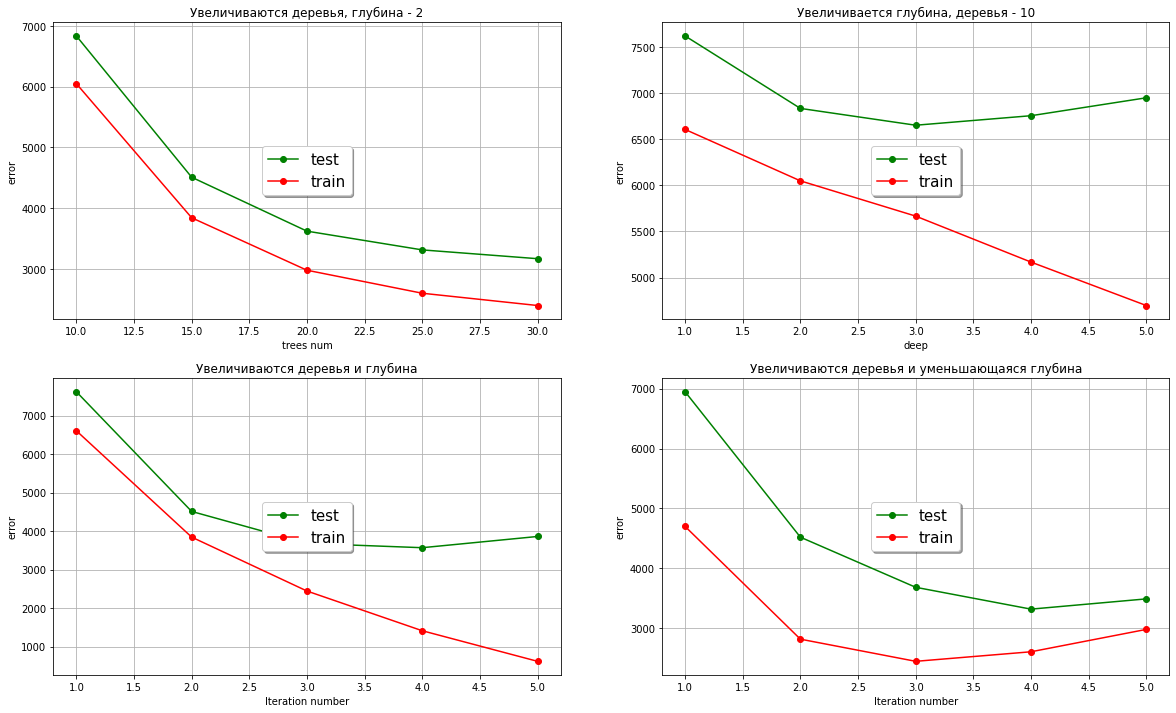

In [40]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, color='g', label = 'test', marker = 'o')
plt.plot(x1, y11, color='r', label = 'train', marker = 'o')
plt.title('Увеличиваются деревья, глубина - 2')
plt.xlabel('trees num')
plt.ylabel('error')
plt.legend(loc = 'center', shadow = True, fontsize = 15)
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(x2, y2, color='g', label = 'test', marker = 'o')
plt.plot(x2, y22, color='r', label = 'train', marker = 'o')
plt.title('Увеличивается глубина, деревья - 10')
plt.xlabel('deep')
plt.ylabel('error')
plt.legend(loc = 'center', shadow = True, fontsize = 15)
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(x3, y3, color='g', label = 'test', marker = 'o')
plt.plot(x3, y33, color='r', label = 'train', marker = 'o')
plt.title('Увеличиваются деревья и глубина')
plt.xlabel('Iteration number')
plt.ylabel('error')
plt.legend(loc = 'center', shadow = True, fontsize = 15)
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(x4, y4, color='g', label = 'test', marker = 'o')
plt.plot(x4, y44, color='r', label = 'train', marker = 'o')
plt.title('Увеличиваются деревья и уменьшающаяся глубина')
plt.xlabel('Iteration number')
plt.ylabel('error')
plt.legend(loc = 'center', shadow = True, fontsize = 15)
plt.grid(True)

### Вывод: при увеличении глубины с неизменным количеством деревьев и одновременном увеличении глубны и количества деревьев наблюдается переобучение модели. При увеличении только количества деревьев наблюдается улучшение результата, но значительно возрастает время обработки данных. Оптимальный результат найден при увеличении количества деревьев и уменьшении глубины (25 деревьев с глубиной 2). Следовательно, для достижения наилучшего результата, следует в разумных пределах увеличивать количество деревьев при небольшой глубине.